# Homework 5

Please follow the guidelines in Sec ***9. Homework Projects*** of the Syllabus. 

Homework projects must be submitted via Canvas as a *working* Jupyter notebook.

## Question 1

In this question, we generalize Newton's method to two dimensions. 

As in the 1D case discussed in class, we begin with the Taylor expansion for a function of two variables
$$
    f(x_{n+1}, y_{n+1}) = f(x_n, y_n) + \frac{\partial f}{\partial x}(x_n, y_n)\cdot (x_{n+1} - x_n)  
        + \frac{\partial f}{\partial y}(x_n, y_n) \cdot (y_{n+1} - y_n) + \cdots
$$
Assuming $f(x_{n+1}, y_{n+1}) \approx 0$, which means that the next interation $(x_{n+1}, y_{n+1})$ gives us a better approximation for a zero of the function $f$ than the previous iteration $(x_{n}, y_{n})$. Hence, we get the equation for $(x_{n+1}, y_{n+1})$:
$$
 0 = f(x_n, y_n) + \frac{\partial f}{\partial x}(x_n, y_n)\cdot (x_{n+1} - x_n)  
        + \frac{\partial f}{\partial y}(x_n, y_n) \cdot (y_{n+1} - y_n),
$$
which can be re-written in the matrix form
$$
\begin{pmatrix}
    \frac{\partial f}{\partial x}(x_n, y_n) &
    \frac{\partial f}{\partial y}(x_n, y_n)
\end{pmatrix}
\begin{pmatrix}
    x_{n+1} - x_n \\
    y_{n+1} - y_n
\end{pmatrix}
= -f(x_n, y_n).
$$


In this case, Newton’s method can be implemented as follows: Given $(x_n, y_n)$, solve 
$$
    \begin{pmatrix}
    \frac{\partial f}{\partial x}(x_n, y_n) &
    \frac{\partial f}{\partial y}(x_n, y_n)
\end{pmatrix}
\vec{\Delta}
= -f(x_n, y_n)
$$
for $\vec{\Delta}$. (*Hint:* use the command `\`.) Then, update 
$$
    x_{n+1} = x_{n} + \Delta_1, \qquad y_{n+1} = y_{n} + \Delta_2.
$$

Code this method up and use it to numerically find the zero of
$$
    f(x, y) = x^2 + y^2.
$$

## Question 2: extra credit for 3170, required for 6170

As discussed in class, Newton’s method also allows to find the complex roots. We just need to pick some initial (complex) guess and perform the iterations
$$
	z_{n+1} = z_n - \frac{f(z_n)}{f'(z_n)}.
$$ 

This iteration scheme hides a beautiful fractal structure, known as [the Newton fractal](https://en.wikipedia.org/wiki/Newton_fractal). Let’s uncover it in the case of function

$$
	f(z) = z^3 - 1.
$$

The polynomial $f(z)$ has three complex roots ($-1/2 \pm i\sqrt{3}/2$ and $1$). For every complex initial guess, Newton’s iteration sequence $z_n$ converges to one of those roots. The Newton fractal appears if we label (i.e., color) every point $c$ in the complex plane by the root to which Newton's method converges when started from $c$.

By adapting the in-class code drawing the Mandelbrot set, visualize the Newton fractal for $ f(z) = z^3 - 1$ in the following way: Use `x[k] + im * y[j]` as the starting point for Newton's method and the imaginary (`imag`) part of $z_{200}$ to color the pixel `image[j, k]`. It is recommend to use `x = range(-5, 5, 1000)` and `y = range(-5, 5, 1000)`.

Hint: The resulting image should look like [this](https://en.wikipedia.org/wiki/Newton_fractal#/media/File:Newtroot_1_0_0_m1.png).

In [3]:
# define function
f(z) = z^3 - 1
# define derivative
f_prime(z) = 3*z^2
# set convergence threshold
threshold = 1e-6
# generate real and imaginary parts of the ranges
x = range(-5, 5, 1000)
y = range(-5, 5, 1000)
@time begin
    image = zeros(length(y), length(x))
    Threads.@threads for j = 1:length(y)
        for k = 1:length(x)
            #set starting point for newtons method
            z = x[k] + im*y[j]
            for step = 1:200
                # Iterate Newton's method until the root is found or the maximum number of steps is reached
            for step = 1:200
                z -= f(z) / f_prime(z)
                if abs(f(z)) < threshold # checks if root has been found
                    image[j, k] = round(imag(z)*200) # colors pixel
                    break
                end
            end
        end
    end
end

  3.440398 seconds (61.22 M allocations: 1.603 GiB, 8.65% gc time, 2.36% compilation time)


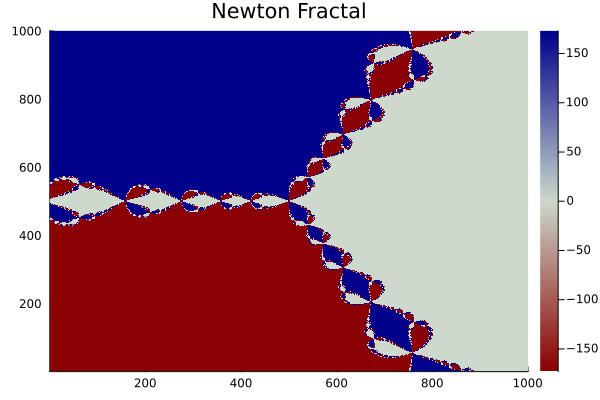

In [7]:
using Plots
# plots function (using Plots over PyPlot [personal preference])
heatmap(image,c=:redsblues,title="Newton Fractal")

## Question 3: extra credit 

Derive and implement Newton's method for solving the system of equations 
$$
\begin{cases}
    f(x) = 0 \\
    g(x) = 0.
\end{cases}
$$

Use the code to numerically solve

$$
\begin{cases}
    f(x) = x^{3}+ 8.5 x^{2}+ 10.0 x- 37.5 = 0 \\
    g(x) = x^{3}- 6.0 x^{2}+ 8.75 x- 3.0 = 0.
\end{cases}
$$

*Hint:* Follow the logic outlined in Question 1 by strating with the Taylor expansions 
$$
\begin{cases}
    f(x_{n+1}) = f(x_n) + f'(x_n)\cdot (x_{n+1} - x_n) + \cdots \\
    g(x_{n+1}) = g(x_n) + g'(x_n)\cdot (x_{n+1} - x_n) + \cdots.
\end{cases}
$$